In [16]:
import pyarrow.dataset as ds
import pyarrow.compute as pc
from openff.toolkit import Molecule

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

In [39]:
def draw_df(df):
    rdmols = [
        Molecule.from_mapped_smiles(smi, allow_undefined_stereo=True).to_rdkit()
        for smi in df.mapped_smiles.unique()
    ]
    return Draw.MolsToGridImage(
        rdmols,
        maxMols=len(rdmols),
        molsPerRow=5,
        subImgSize=(200, 150)
    )

In [7]:
dataset = ds.dataset("analysis")
dataset.count_rows()

1398647

In [3]:
dataset.schema

mapped_smiles: string
inchi: string
record_id: string
type: string
parameter_id: string
parameter_type: string

In [58]:
expression = pc.field("parameter_id") == "a17"
subset = dataset.filter(expression)
subset.count_rows()

8

In [59]:
df = subset.to_table().to_pandas()
df

,mapped_smiles,inchi,record_id,type,parameter_id,parameter_type
0,[H:8][C:1]#[N+:5][C:4]([H:12])([H:13])[C:2](=[...,"InChI=1/C4H6NO2/c1-5-3-4(6)7-2/h1H,3H2,2H3/q+1",2703330,torsion,a17,Angles
1,[H:7][C:3]([H:8])([C:2](=[O:5])[O:6][H:9])[N+:...,"InChI=1/C3H3NO2/c1-4-2-3(5)6/h2H2,(H,5,6)/f/h5H",37025430,torsion,a17,Angles
2,[H:10][C:2](=[S:9](=[C:3]([H:12])[H:13])([C:4]...,"InChI=1/C6H9NOS/c1-7-5-6(8)9(2,3)4/h2-3,5H2,4H3",37025489,torsion,a17,Angles
3,[H:8][C:1]#[N+:5][C:4]([H:12])([H:13])[C:2](=[...,"InChI=1/C4H6NO2/c1-5-3-4(6)7-2/h1H,3H2,2H3/q+1",18434079,optimization,a17,Angles
4,[H:8][C:1]#[N+:5][C:4]([H:12])([H:13])[C:2](=[...,"InChI=1/C4H6NO2/c1-5-3-4(6)7-2/h1H,3H2,2H3/q+1",2002991,optimization,a17,Angles
5,[H:8][C:3]([H:9])([H:10])[O:7][C:2](=[O:6])[C:...,"InChI=1/C4H5NO2/c1-5-3-4(6)7-2/h3H2,2H3",2703333,torsion,a17,Angles
6,[H:8][C:3]([H:9])([H:10])[O:7][C:2](=[O:6])[C:...,"InChI=1/C4H5NO2/c1-5-3-4(6)7-2/h3H2,2H3",2002992,optimization,a17,Angles
7,[H:8][C:3]([H:9])([H:10])[O:7][C:2](=[O:6])[C:...,"InChI=1/C4H5NO2/c1-5-3-4(6)7-2/h3H2,2H3",2002993,optimization,a17,Angles


In [60]:
len(df.inchi.unique())

4

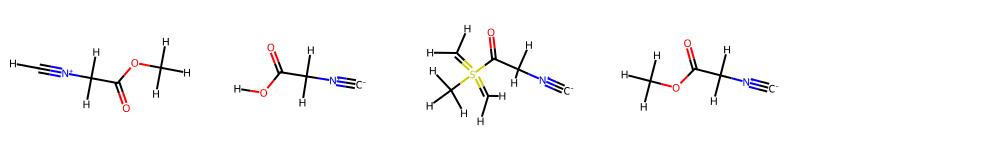

In [61]:
draw_df(df)